# Data Statistics Analysis

This notebook performs initial data analysis. No models are trained in this notebook but fundamental information about the dataset is explored for use in making decisions about the models that were ultimately developed.

### Read and Combine Data

In [3]:
import pandas as pd

# read in all data
test = pd.read_csv('../data/test.txt', delimiter=';',names=['text', 'target'])
train = pd.read_csv('../data/train.txt', delimiter=';',names=['text', 'target'])
val = pd.read_csv('../data/val.txt', delimiter=';',names=['text', 'target'])

# display size of splits
print('test:     ',test.shape)
print('train:    ',train.shape)
print('val:      ',val.shape)

# combine all data and display size
data = pd.concat([test,train,val])
print('combined: ',data.shape)

# display sample of data
pd.options.display.max_colwidth = 200
data.sample(50)


test:      (2000, 2)
train:     (16000, 2)
val:       (2000, 2)
combined:  (20000, 2)


,text,target
13771,i have become a mother and my body has changed so much but following this style i still feel gorgeous and more confident than ever,joy
5401,i feel like pulling a paige from charmed just dont hurt me ok,joy
1987,i feel depressed i feel like they would ve been negative because i hadn t been the most influential big brother,sadness
10510,i empathize with the feeling of being dissatisfied not where i want to be but no i dont feel that way,anger
920,i kept feeling wonderful as i ran and couldnt believe it,joy
973,i feel pretty jolly,joy
6074,i had been feeling slightly distressed and my pride was resisting me just waiting for the next peregrinos to walk past and help me out,fear
2865,i feel really low,sadness
28,i feel kinda appalled that she feels like she needs to explain in wide and lenghth her body measures etc pp,anger
7316,i wonder how it feels to have angered and disappointed millions of people in one morning,anger


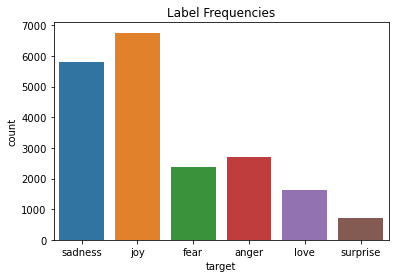

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# display counts for each label
sns.countplot(data.target)
plt.title('Label Frequencies')
plt.savefig('../plots/label_counts.pdf')


length mean:  96.67005


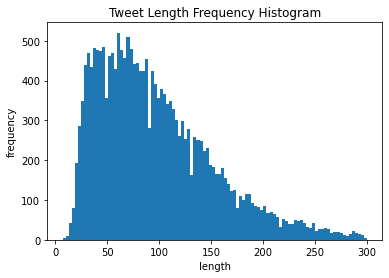

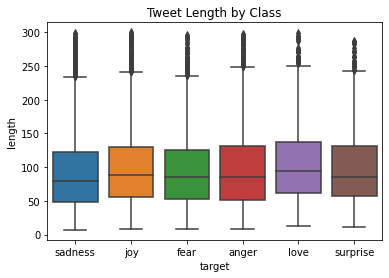

In [13]:


# add length of text strings
data['length'] = data.text.apply(lambda x: len(x))

print('length mean: ',np.mean(data.length))

plt.figure()
plt.xlabel('length')
plt.ylabel('frequency')
plt.title('Tweet Length Frequency Histogram')
plt.hist(data['length'],bins=100)
plt.savefig('../plots/tweet_length_hist.pdf')

plt.figure()
sns.boxplot(x='target', y='length',data=data)
plt.title('Tweet Length by Class')
plt.savefig('../plots/tweet_length.pdf')


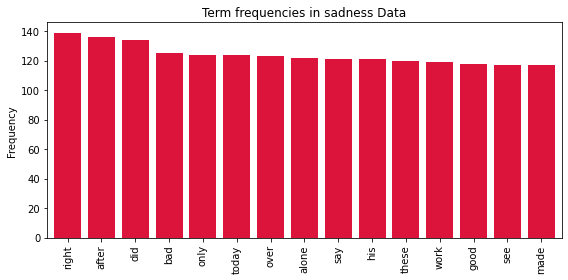

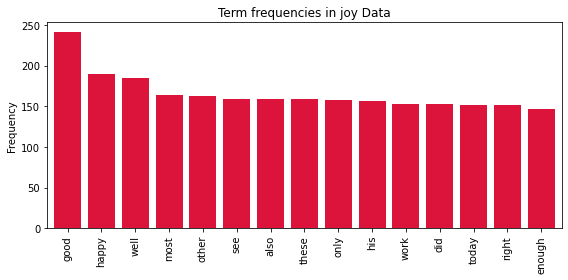

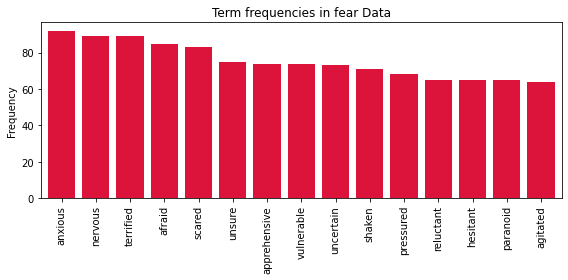

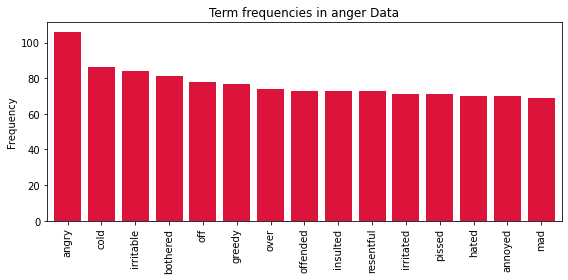

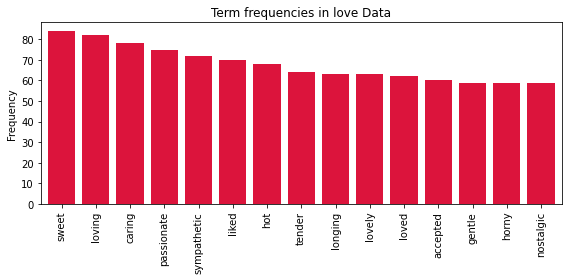

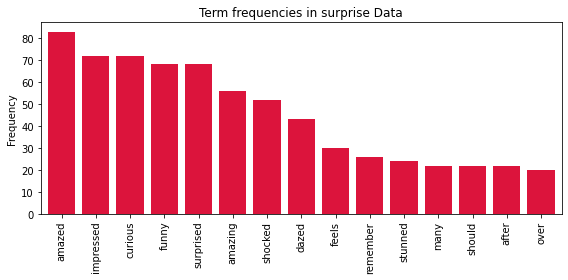

num excluded:  85


['feel',
 'and',
 'the',
 'feeling',
 'that',
 'like',
 'for',
 'was',
 'but',
 'have',
 'this',
 'not',
 'with',
 'just',
 'about',
 'when',
 'you',
 'because',
 'all',
 'been',
 'really',
 'know',
 'can',
 'myself',
 'out',
 'being',
 'more',
 'get',
 'how',
 'are',
 'very',
 'will',
 'time',
 'what',
 'little',
 'still',
 'her',
 'had',
 'from',
 'now',
 'would',
 'want',
 'even',
 'bit',
 'people',
 'think',
 'one',
 'them',
 'who',
 'they',
 'some',
 'its',
 'there',
 'strange',
 'him',
 'ive',
 'life',
 'things',
 'dont',
 'much',
 'make',
 'day',
 'something',
 'going',
 'way',
 'don',
 'pretty',
 'she',
 'love',
 'could',
 'into',
 'weird',
 'overwhelmed',
 'back',
 'too',
 'always',
 'has',
 'then',
 'cant',
 'than',
 'which',
 'feelings',
 'their',
 'your',
 'need']

In [16]:
from collections import Counter
import numpy as np

def word_freq(data,num,exclude):
    alltext = ' '.join(data)
    all_list = alltext.split()

    all_list = [s for s in all_list if len(s) > 2] # remove short common words
    all_list = [s for s in all_list if s not in exclude]

    tf = Counter(all_list)

    y = [count for tag, count in tf.most_common(num)]
    x = [tag for tag, count in tf.most_common(num)]
    return x, y

def plot_hist(x, y, txt):
    plt.figure(figsize=(8,4))
    plt.bar(x, y, color='crimson')
    plt.title("Term frequencies in {} Data".format(txt))
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.xlim(-0.6, len(x)-0.4)  # optionally set tighter x lims
    plt.tight_layout()  # change the whitespace such that all labels fit nicely
    plt.savefig('../plots/unique_freq_'+txt+'.pdf')
    plt.show()
    


# plot word frequency historgams
num = 15; done = False
exclude = ['feel']
while not done:
    sx, sy = word_freq(data[data.target.eq('sadness')].text, num, exclude)  
    jx, jy = word_freq(data[data.target.eq('joy')].text, num, exclude)  
    fx, fy = word_freq(data[data.target.eq('fear')].text, num, exclude) 
    ax, ay = word_freq(data[data.target.eq('anger')].text, num, exclude)  
    lx, ly = word_freq(data[data.target.eq('love')].text, num, exclude)  
    ux, uy = word_freq(data[data.target.eq('surprise')].text, num, exclude) 
    alltop = sx + jx + fx + ax + lx + ux
    c = Counter(alltop)
    if c.most_common(1)[0][1] > 3:
        for key in c:
            if c[key] > 1:
                exclude.append(key)
    else:
        done = True

plot_hist(sx, sy, 'sadness')
plot_hist(jx, jy, 'joy')
plot_hist(fx, fy, 'fear')
plot_hist(ax, ay, 'anger')
plot_hist(lx, ly, 'love')
plot_hist(ux, uy, 'surprise')

print('num excluded: ',len(exclude))
exclude
